### Ensemble Learning

__Intro__

In ensemble learning instead of prediction based of single model we combine all models(Naive Bayes, KNN, Decision Tree) and we give training data to each of the model and ask them to make prediction to each of the model. The majority of them is the final prediction which is called ensemble prediction. So each of model has own strength and weakness, we combine them and based on the behavior we then supposed final prediction.

__Importance__

1) Improve prediction accuracy by combining different models
2) Enhances model resilience and robustness against uncertainties it means that every model has its own strength and weakness. decision tree do perform on categorical data Very well. Navebase performs on data which is not correlated, so the strengths of all the models they come together. they compensate the weaknesses of the different model, and collectively, you will see that they will be able to cater to the edge cases, the worst scenarios, right and etc. That's what we call as robustness. They are resilience to. You know, those outliers, those extreme data observations
3) Mitigates biases and errors present in individual models

__Weak learners and Strong learners in ensemble learning__

A weak learner simply means that a model which is not properly trained, which is not comprehensively trained. A strong learner means a model which is very strongly trained with the least possible error.An ensemble (or committee) of classifiers is a classifier build upon some combination of Weak learner. The strategy of boosting, and ensembles of classifiers, is to learn mistakes from many weak classifiers and combine them, instead of trying to learn a single Strong learner.g.

__Categories in Ensemble learning__

Ensemble learning classified two categories:

1) Sequential Ensemble Technique
2) Parallel Ensemble Technique

Ensemble learning is the combining of models. how do you combine them? There are 2 ways of combining. 1)  sequential manner That is, one by one 
and 2nd, you can combine them in a parallel manner

1) __Sequential Ensemble Technique:__ we take training data then we do multiple samples of the training data. We train our model on the sample. Let's say S1, S2, ..., Sn are samples of training data. So I train our model M1 on sample S1, not on the entire data. Now, what happen this model will learn to fit to your data Now M1 can be a weak learner, it will also make mistakes

What do we do nexts? 
We train our Model M2 on sample S2 to learn to fit sample S2, but focus on the mistakes made by M1 So each model learn from previous model and try to fix the mistakes made by previous model. We keep on adding models until we see that the mistakes are all fixed. But there are no more new mistakes made by the model Finally, we combine them and then get their aggregate prediction.

If all four base models are of the same type, it is considered to be a homogeneous ensemble. If they are different, it is considered heterogeneous.

2) __Parallel Ensemble Technique:__ We take training data then we Divide the training data into multiple samples let's say S1, S2, ..., Sn. we train our model M1, M2, ...,Mn on sample S1, S2, ...,Sn respectively. here the traning of models on samples parallelly not one by one. So the models make independent predictions. finally, combine all predictions and aggregate their predictions.

__Two Techniques(Algorithms) used in Ensemble learning__

1) Simple Technique

   - Voting
   - Averaging
   - Weighted Averaging

2) Advance Techniques:-

   - Bagging
   - Boosting
   - Stacking

__Voting:__

Voting is one of the fundamental methods of ensemble learning. It involves aggregating the predictions from multiple models to arrive at a final prediction. it is used for classification and Regression problem both.

Voting, Averaging, Weighted Averaging, Bagging, Stacking, Random Forest algoritms are examples of __Parallel Ensemble Technique.__

Voting is also categories in two categories:

1) Majority Voting/ Hard Voting
2) Weighted Voting/ Soft Voting


__Majority Voting/ Hard Voting:__  Majority Voting or Hard Voting is an ensemble learning classification technique. It involves multiple models, making predictions for each data point. Each model's prediction is considered a __vote__ The final prediction is determined by the majority vote among the models. that is the final prediction is determined based on the most commonly predicted class among all classifiers.

__Let's impliment Majority Voting/ Hard Voting on breast cancer classification dataset__

In [7]:
import pandas as pd

# Load the dataset from the specified URL and assign column names to the DataFrame
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


__why header=None used?__

The dataset we are loading consists of raw data without column names. if header=None is not used, pandas will treat the first row of the dataset as column names which lead to Loss of the first row of data

In [12]:
# write columns name for 11 column
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

In [14]:
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [16]:
data['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [18]:
# no use of Sample code column so remove it
data=data.drop('Sample code', axis=1)
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [20]:
data.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [22]:
data['Clump Thickness'].value_counts()

Clump Thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64

In [24]:
data['Uniformity of Cell Size'].value_counts()

Uniformity of Cell Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64

In [26]:
data['Uniformity of Cell Shape'].value_counts()

Uniformity of Cell Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64

In [28]:
data['Marginal Adhesion'].value_counts()

Marginal Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64

In [30]:
data['Single Epithelial Cell Size'].value_counts()

Single Epithelial Cell Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64

In [32]:
data['Bare Nuclei'].value_counts()

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [34]:
data['Bland Chromatin'].value_counts()

Bland Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: count, dtype: int64

In [36]:
data['Normal Nucleoli'].value_counts()

Normal Nucleoli
1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
7      16
9      16
Name: count, dtype: int64

In [38]:
data['Mitoses'].value_counts()

Mitoses
1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: count, dtype: int64

We can see ? present in 'Bare Nuclei' column. Replace ? with nan to handle missing value

In [41]:
# Replace ? to nan to handle the missing value
import numpy as np
data=data.replace('?', np.nan)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  683 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [45]:
# Convert the 'Bare Nuclei' column to an integer type

data['Bare Nuclei']=pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [47]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [51]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [53]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [55]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [57]:
# fill missing value, if any, using simpleimputer

imputer=SimpleImputer(strategy='median')
x_train_imputed=imputer.fit_transform(x_train)
x_test_imputed=imputer.transform(x_test)

In [59]:
# Scale the features using minmax scalling to scale in the range(0,1)

scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train_imputed)
x_test_scaled=scaler.transform(x_test_imputed)

In [61]:
# initialize list of base model

estimator=[
    ('Regression', LogisticRegression()),
    ('tree', DecisionTreeClassifier()),
    ('svm', SVC())
]
ensemble = VotingClassifier(estimator, voting='hard')
ensemble.fit(x_train_scaled, y_train)

VotingClassifier(estimators=[('Regression', LogisticRegression()),
                             ('tree', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [63]:
y_train_pred=ensemble.predict(x_train_scaled)
y_test_pred=ensemble.predict(x_test_scaled)

training_accuracy=accuracy_score(y_train, y_train_pred)
testing_accuracy=accuracy_score(y_test, y_test_pred)
# testing_accuracy=ensemble.score(x_test_scaled, y_test) from both way same value .score is in builtin function in sklearn

print('HardVotingclassification:')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

HardVotingclassification:
Training Accuracy : 0.9803220035778175
Testing Accuracy : 0.9571428571428572


In [65]:
kfold=KFold(n_splits=10, shuffle=True, random_state=7)
result=cross_val_score(ensemble, x_train_scaled, y_train, cv=kfold)
print('Cross validation scores :',result)
print('Mean of Scores :',result.mean())

Cross validation scores : [0.96428571 0.98214286 0.91071429 0.98214286 0.96428571 0.98214286
 1.         0.91071429 0.94642857 0.98181818]
Mean of Scores : 0.9624675324675325


Even our training accuracy is 98% and testing accuracy is 96% so model generalize well slight overfitting but from scores model not consistent

In [68]:
print('Classification Report :')
print(classification_report(y_test, y_test_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        91
           1       0.94      0.94      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



Confusion Matrix :
[[88  3]
 [ 3 46]]


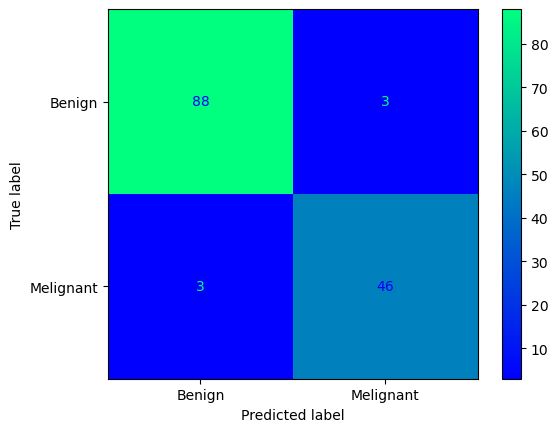

In [70]:
# plot confusion matrix

conf_mat = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix :')
print(conf_mat)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Benign', 'Melignant'])
cm_display.plot(cmap='winter')
plt.show()

__Weighted Voting/Soft Voting__

When you use probabilities(predict_proba) to do the prediction, it's called as soft voting.

When you actually use the labels to do the prediction(predicted label). Then it's called as hard.

soft voting is a better mechanism for multi-class classification. Hard voting is good when you are doing binary classification. It's not that hard voting will not work for multi-class. It will still work. but it has a small drawback

__Remark__

Pipeline and make_pipeline both class use for same purpose the slight difference.

Pipeline is a class that define the steps of the pipeline as a list of tuples, where each tuple contains a name and the corresponding transformer/estimator. Pipeline Explicit control over the names of each step and Useful when you want to customize step names or access individual steps easily.

But make_pipeline is a class that define only transformer/estimator. it is easy to use no need to write name it automatically generates names for the steps.

In [85]:
# Construct pipeline for estimators

from sklearn.pipeline import make_pipeline

model1=make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LogisticRegression(max_iter=10000, random_state=7))
model2=make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), DecisionTreeClassifier(random_state=7))
model3=make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), SVC(probability=True, random_state=7))

In [87]:
estimator=[
    ('Regression', model1),
    ('tree', model2),
    ('svm', model3)
]

In [90]:
hard_voting_classifier=VotingClassifier(estimator, voting='hard')
hard_voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('Regression',
                              Pipeline(steps=[('simpleimputer',
                                               SimpleImputer(strategy='median')),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(max_iter=10000,
                                                                  random_state=7))])),
                             ('tree',
                              Pipeline(steps=[('simpleimputer',
                                               SimpleImputer(strategy='median')),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('decisiontreeclassifier',
                                               DecisionTreeClassifier(random_state=7))])),
                             ('svm',
                              Pipeline(steps=[('simpleimputer',
                                               SimpleImputer(strategy='median')),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(probability=True,
                                                   random_state=7))]))])

In [93]:
y_train_pred=hard_voting_classifier.predict(x_train)
y_test_pred=hard_voting_classifier.predict(x_test)

training_accuray=accuracy_score(y_train, y_train_pred)
testing_accuracy=accuracy_score(y_test, y_test_pred)

print('Hard Voting Classifier :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Hard Voting Classifier :
Training Accuracy : 0.9803220035778175
Testing Accuracy : 0.9642857142857143


In [99]:
# cross validation

kfold=KFold(n_splits=10, shuffle=True, random_state=7)
result=cross_val_score(hard_voting_classifier, x_train, y_train, cv=kfold, scoring='accuracy')
print('Hard : Cross validation scores :',result)
print('Hard : Mean of Scores :',result.mean())

Hard : Cross validation scores : [0.96428571 0.98214286 0.91071429 1.         0.96428571 0.98214286
 1.         0.91071429 0.96428571 0.98181818]
Hard : Mean of Scores : 0.9660389610389609


Hard : Confusion Matrix :
[[88  3]
 [ 2 47]]


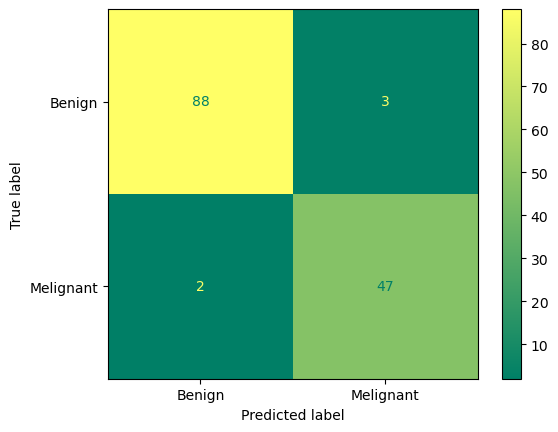

In [103]:
conf_mat=confusion_matrix(y_test, y_test_pred)
print('Hard : Confusion Matrix :')
print(conf_mat)

cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Benign', 'Melignant'])
cm_display.plot(cmap='summer')
plt.show()

In [105]:
print('Hard: Classification Report :')
print(classification_report(y_test, y_test_pred))

Hard: Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [107]:
soft_voting_classifier=VotingClassifier(estimator, voting='soft')
soft_voting_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('Regression',
                              Pipeline(steps=[('simpleimputer',
                                               SimpleImputer(strategy='median')),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(max_iter=10000,
                                                                  random_state=7))])),
                             ('tree',
                              Pipeline(steps=[('simpleimputer',
                                               SimpleImputer(strategy='median')),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('decisiontreeclassifier',
                                               DecisionTreeClassifier(random_state=7))])),
                             ('svm',
                              Pipeline(steps=[('simpleimputer',
                                               SimpleImputer(strategy='median')),
                                              ('standardscaler',
                                               StandardScaler()),
                                              ('svc',
                                               SVC(probability=True,
                                                   random_state=7))]))],
                 voting='soft')

In [115]:
y_train_pred_soft=soft_voting_classifier.predict(x_train)
y_test_pred_soft=soft_voting_classifier.predict(x_test)

training_accuray=accuracy_score(y_train, y_train_pred_soft)
testing_accuracy=accuracy_score(y_test, y_test_pred_soft)

print('soft Voting Classifier :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

soft Voting Classifier :
Training Accuracy : 0.9803220035778175
Testing Accuracy : 0.9642857142857143


In [117]:
# cross validation

kfold=KFold(n_splits=10, shuffle=True, random_state=7)
result=cross_val_score(soft_voting_classifier, x_train, y_train, cv=kfold, scoring='accuracy')
print('Soft : Cross validation scores :',result)
print('Soft : Mean of Scores :',result.mean())

Soft : Cross validation scores : [0.96428571 0.98214286 0.91071429 0.98214286 0.96428571 0.98214286
 1.         0.89285714 0.94642857 0.98181818]
Soft : Mean of Scores : 0.9606818181818182


Soft : Confusion Matrix :
[[88  3]
 [ 2 47]]


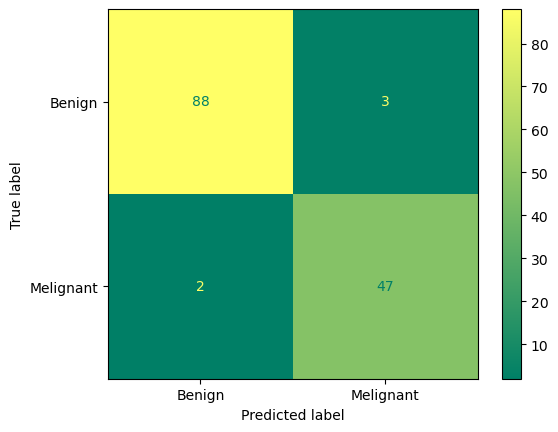

In [119]:
conf_mat=confusion_matrix(y_test, y_test_pred_soft)
print('Soft : Confusion Matrix :')
print(conf_mat)

cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Benign', 'Melignant'])
cm_display.plot(cmap='summer')
plt.show()

In [122]:
print('Soft: Classification Report :')
print(classification_report(y_test, y_test_pred_soft))

Soft: Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



__Averaging__

Averaging is a technique used for regression problems. In this method, the predictions of multiple models are averaged to obtain the final prediction. This technique helps reduce variance and produces a more stable prediction.

__What we do in this__

1) Averaging the combined predictions from multiple classifiers trained on the dataset.
2) These classifiers, such as Logistic Regression, Decision Tree, and Support Vector Machine, provide individual predictions for each data point.
3) Then it takes the average of these predictions to form a final prediction.
4) This approach helps to mitigate biases and uncertainties inherent in individual models, leading to a more accurate prediction

In [133]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [139]:
from sklearn.pipeline import make_pipeline
model1=make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler(), LogisticRegression())
model2=make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler(), DecisionTreeClassifier())
model3=make_pipeline(SimpleImputer(strategy='median'), MinMaxScaler(), SVC(probability=True))

In [151]:
model1.fit(x_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [154]:
model2.fit(x_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [156]:
model3.fit(x_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(probability=True))])

In [161]:
reg_probability=model1.predict_proba(x_test)[:,1]
tree_probability=model2.predict_proba(x_test)[:,1]
svm_probability=model3.predict_proba(x_test)[:,1]

In [169]:
aveg_prob=np.mean([reg_probability, tree_probability, svm_probability], axis=0)
aveg_prob

array([0.00358447, 0.00873416, 0.0079734 , 0.92894999, 0.00602832,
       0.00496833, 0.02745169, 0.98109421, 0.97790044, 0.11438154,
       0.00612212, 0.91878044, 0.00650179, 0.01528417, 0.00650179,
       0.98647128, 0.00359106, 0.98811586, 0.96119038, 0.86485715,
       0.98434527, 0.0041075 , 0.49907526, 0.00359106, 0.97480097,
       0.01682579, 0.00728463, 0.9884092 , 0.02614684, 0.97493256,
       0.00716044, 0.00944488, 0.00873416, 0.97609766, 0.00359106,
       0.01347736, 0.00545604, 0.98463674, 0.00368135, 0.98328472,
       0.00612212, 0.04368821, 0.97982678, 0.00411615, 0.00650179,
       0.01215521, 0.01767503, 0.59555634, 0.00872785, 0.11320613,
       0.02134629, 0.00496833, 0.98650688, 0.0048954 , 0.63157877,
       0.01127421, 0.01215521, 0.97974704, 0.00545604, 0.0079734 ,
       0.00612212, 0.00639323, 0.9801802 , 0.01817047, 0.0048954 ,
       0.00525483, 0.98820665, 0.96154798, 0.02711361, 0.01029925,
       0.98124995, 0.01086593, 0.98595143, 0.00979232, 0.00728

In [178]:
# Convert averaged probabilities to class predictions based on a threshold
aveg_preds=(aveg_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test, aveg_preds)
print("Accuracy of averaged model predictions on test data:", accuracy)

Accuracy of averaged model predictions on test data: 0.9571428571428572


The averaging ensemble achieves an accuracy of 95%, slightly lower than the voting ensemble. 

__Weighted Averaging__

Weighted averaging is a technique used for regression problems. Weighted averaging assigns different weights to each model’s prediction. The final prediction is a weighted average, which can be more effective than simple averaging because it considers each model's performance.

__What is Weighted Averaging__

For a set of models M1, M2, ..., Mn and corresponding W1, W2, ..., Wn the weighted averaging prediction is: y = ∑Wi*Mi/∑Wi. if weights is normalized that is ∑Wi=1 then weighted average prediction is y = ∑Wi*Mi

See code:-

weights = np.array([0.5, 0.3, 0.2])  # weights corresponding to w1, w2, w3 These should sum to 1 (normalize)

#Combine predictions using weighted averaging

#use it instead of np.mean in averaging code above 

final_predictions = (

    weights[0] * model_1_preds +
    
    weights[1] * model_2_preds +
    
    weights[2] * model_3_preds
)

print("Final Weighted Averaged Predictions:", final_predictions)

## Advance Technique in Ensemble Learning

### Bagging

Bagging or Bootstrap Aggregeting is use to reduce variance & enhance stability and accuracy of machine learning algorithm by training the same model on different subsets of the data. This multiple subset is know as bootstrap sample.

Since,Bagging is a Parallel Ensemble Learning algorithm So for final prediction Bagging combines the individual models and output by using hard voting (for classification tasks) & averaging (for regression tasks). This approach effectively reduces variance and prevent overfitting.

__Note:__ Random Forest is a popular algorithm that uses Bagging by training the multiple Decision Tree algorithm on different Bootstrap Samples and combining their predictions.

__Remark:__ When Output of Bagging algorithm comes by use of Voting algoritm then how Bagging is different from Voting?

ANS:- 
1) We apply voting on whole traing set but Bagging apply on samples of training set
2) In voting we train different Machine Learning algorithm on whole traing set then combine the prediction after for final prediction either we use soft or hard voting but Bagging train same Machine learning algorithm on different bootsrap sample of training set. and then combine the prediction for final prediction we use majority(Hard) voting only.
3) Voting is use to improve performance of model but Bagging use to reduce variance & enhance stability.

__Important Remark:__

In Bagging, is only uses the Decision Tree algorithm as the base estimator(model)?

__ANS:__

No, there is no restriction to use Decision tree as base model. But remember Bagging works best with unstable model, where slight change in training data cause the significant change in prediction. Decision tree is a unstable model. it is model with high varience so we use bagging with decision tree as base model to reduce variance and enhance stability. 

Other algorithm KNN use as base model when dataset is small and simple structure

Logistic Regression is a stable model so no more benefit to use it as base model same for SVM so Finally we conclude that Decision Tree is best base model in bagging. 

__If Decision Tree algorithm exist then why we need to apply Bagging on it?__

Because after applying the decision tree if varience is high and model is overfitted then Bagging is the best way to reduce overfitting and enhance stability of Decisition tree model. Note that Bagging + Decision Tree = Random Forest is a very popular ensemble technique.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [31]:
# Load the Pima Indians Diabetes dataset using the given URL

url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(url, header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
# assign column name

data.columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
data.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

'class' column is the target variable here we have to predict the diabetic(positive class/ class 1) & non-diabetic(negative class/ class 0)

In [40]:
x=data.iloc[:,:-1]
y=data['class']

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)  for oob_score

scikit-learn without specifying the test_size or train_size parameters, it defaults to splitting the dataset into 75% training data and 25% test data. 

In [202]:
data['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

In [204]:
imputer=SimpleImputer(strategy='median')
x_train_imputed=imputer.fit_transform(x_train)
x_test_imputed=imputer.transform(x_test)

scaler=MinMaxScaler()
x_train_sc=scaler.fit_transform(x_train_imputed)
x_test_sc=scaler.transform(x_test_imputed)

__Apply Bagging Technique__

In [207]:
bagging_model=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=100, oob_score=True, random_state=42)
bagging_model.fit(x_train_sc, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=100, oob_score=True, random_state=42)

Taking 100 DecisionTreeClassifier as base estimator 

In [210]:
# cross validation score

kfold=KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores=cross_val_score(bagging_model, x_train_sc, y_train, cv=kfold, scoring='accuracy')
print('Cross validation scores :',cv_scores)
print('cv scores mean :',cv_scores.mean())

Cross validation scores : [0.82258065 0.72580645 0.74193548 0.69354839 0.73770492 0.78688525
 0.72131148 0.78688525 0.7704918  0.70491803]
cv scores mean : 0.7492067689053411


The resultant mean cross-validation score of 0.76, enhancing predictive performance compared to a single decision tree classifier.

In [213]:
y_train_pred=bagging_model.predict(x_train_sc)
y_test_pred=bagging_model.predict(x_test_sc)

training_accuracy=accuracy_score(y_train, y_train_pred)
testing_accuracy=accuracy_score(y_test, y_test_pred)

print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)
print('OOB Score :',bagging_model.oob_score_)

Training Accuracy : 0.7915309446254072
Testing Accuracy : 0.7662337662337663
OOB Score : 0.762214983713355


Training accuracy(100%) and Testing accuracy (75%), it indicates that the model is overfitted so i fixed max_depth =3 no overfitting.training accuracy (79%) and testing accuracy(77%) indicates that model generalize well without overfitting
testing_accuracy and oob_score is approx same it means that indicated that model generalize well. please note that testing accuracy and oob_score should be ideally close, which indicate model generalize well.

In [216]:
print('Bagging Classification Report :')
print(classification_report(y_test, y_test_pred))

Bagging Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



Confusion Matrix :
[[86 13]
 [23 32]]


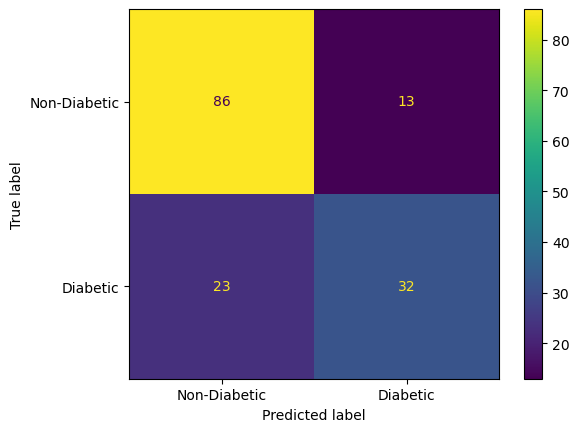

In [218]:
conf_mat=confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix :')
print(conf_mat)

cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Non-Diabetic', 'Diabetic'])
cm_display.plot()
plt.show()

__Out of Box(OOB)__ 

out-of-bag  is a technique used to estimate the performance of the model without the need for a separate validation or test set.

__What is oob_score__

When using Bagging, each base estimator (model) is trained on a bootstrapped subset of the training data, meaning some instances are randomly selected with replacement, while others are left out.
The instances that are not included in the training subset for a specific base estimator are called out-of-bag (OOB) samples.
These OOB samples used as a validation set to evaluate the performance of that specific base estimator.
Aggregated performance score across all OOB samples is oob_score.


__Remark:__

1) oob_score provides an unbiased estimate of the model's generalization performance without using a separate validation set.
2) we use oob_score When we want to evaluate model performance without splitting the dataset.(i.e. without using test_size parameter in train_test_split class. that is x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
3) Range of oob_score between 0 to 1. 0 means model entirely incorrect prediction for oob sample and 1 means model entirely correct prediction for oob sample
4) The OOB score should ideally be close to the accuracy or performance metrics on the test set(i.e. testing accuracy), indicating that the model generalizes well.
5) values closer to 1 indicating better performance.
6) oob_error=1 - obb_score so for better performance oob_score should be close to 1 and oob_error should be close to 0.

__Boosting__

Boosting is a sequential ensemble technique where each model learns and corrects error of  previous model. The final prediction is weighted sum of all model's predictions. Boosting significantly reduce bias and variance leading to more accurate model.

Popular boosting algorithm are below:-

1) Adaboost
2) Gradient Boost
3) Extreme Gradient Boost(XGBoost)
4) CatBoost

__Adaboost__

1) Initially, the algorithm assigns equal weights to all observations in the dataset
2) Predictions are made on the entire dataset using this model
3) The algorithm computes errors by comparing these predictions to the actual values.
4) The subsiquent algorithm assigns higher weights to incorrectly predicted data points.
5) Weights are determined based on error values, higher errors result in heavier weights.
6) This iterative process continues until the error function stabilizes or the algorithm reaches the maximum limit of estimators.
7) AdaBoost Algorithm use for Regression and classification task both but it manly focus on classification problem

In [54]:
# Load the breast cancer dataset from the given URL
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [56]:
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [58]:
data.head()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [60]:
data['Bare Nuclei'].value_counts()

Bare Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [62]:
data=data.drop('Sample code', axis=1)
import numpy as np
data=data.replace('?', np.nan)
data['Class']=data['Class'].replace({2 : 0, 4 : 1})

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  683 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [66]:
data['Bare Nuclei'].skew()

0.9900156547006164

In [68]:
data.isna().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

on column 'Bare Nuclei' the skewness is 0.99 so it is moderate positive skewness so we can use mean to fill the missing values

In [71]:
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [73]:
x=data.drop('Class', axis=1)
y=data['Class']

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [77]:
# imputer=SimpleImputer(strategy='mean')
# x_train_imputed=imputer.fit_transform(x_train)
# x_test_imputed=imputer.transform(x_test)

# No need to use it seperatly it can high risk of data leakage use it with pipeline
# if we want to fill it by 0 then also no need to use .fillna(0) use SimpleImputer(strategy='constant', fill_value=0) in pipeline

In [79]:
from sklearn.pipeline import Pipeline
adaboost_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('classifier', AdaBoostClassifier(n_estimators=70,algorithm='SAMME', random_state=7))
])
adaboost_pipeline.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME', n_estimators=70,
                                    random_state=7))])

In [81]:
x_train['Bare Nuclei'].value_counts()

Bare Nuclei
1     321
10    105
2      27
5      24
3      22
8      15
4      14
7       8
9       7
6       2
Name: count, dtype: int64

In [83]:
x_test['Bare Nuclei'].value_counts()

Bare Nuclei
1     81
10    27
8      6
5      6
3      6
4      5
2      3
9      2
6      2
Name: count, dtype: int64

SAMME.R is default algorithm in Adaboost classifier it will removed from next version so to avoid warning we use algorithm='SAMME'. the SAMME.R worked on wieghted sum but SAMME is based on the wieghted majority voting(hard) so the final prediction based on majority class. it also enhance the model performance.

In [289]:
y_train_pred=adaboost_pipeline.predict(x_train)
y_test_pred=adaboost_pipeline.predict(x_test)

training_accuracy=accuracy_score(y_train, y_train_pred)
testing_accuracy=accuracy_score(y_test, y_test_pred)

print('AdaBoost Classifier :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

AdaBoost Classifier :
Training Accuracy : 0.9785330948121646
Testing Accuracy : 0.9571428571428572


Training Accuracy is 98% and Testing Accuracy is 96% it indicates that model generalize well without overfitting.

In [138]:
# either we can use above one or this one for testing accuracy .score function is builtin function in sklearn result from both will be same
adaboost_test_score = adaboost_pipeline.score(x_test, y_test)
adaboost_test_score

0.9571428571428572

In [141]:
# cross validation
kfold=KFold(n_splits=10, shuffle=True, random_state=7)
cv_scores=cross_val_score(adaboost_pipeline, x_train, y_train, cv=kfold, scoring='accuracy')
print('Cross Validation Score :',cv_scores)
print('cv_scores mean :',cv_scores.mean())

Cross Validation Score : [0.94642857 0.96428571 0.91071429 0.96428571 0.98214286 0.94642857
 1.         0.91071429 0.94642857 0.96363636]
cv_scores mean : 0.9535064935064934


In [145]:
print('Adaboost classification report :')
print(classification_report(y_test, y_test_pred))

Adaboost classification report :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.96      0.92      0.94        49

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



Confusion Matrix :
[[89  2]
 [ 4 45]]


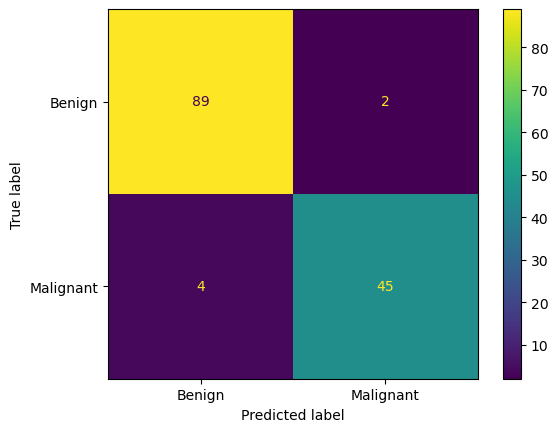

In [147]:
conf_mat=confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix :')
print(conf_mat)
cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Benign', 'Malignant'])
cm_display.plot()
plt.show()

This demonstrates the importance and effectiveness of AdaBoost in enhancing the predictive capability of weak learners, like decision trees

__Gradient Boosting Machine(or Gradient Boosting or Gradient tree boosting)(GBM):__

Gradient Boosting is a boosting method that comes under the ensemble machine learning algorithm that use for classification and regression tasks. it is based on decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models.

__Loss Function:__

- Mean Absolute error or Mean squared error use as a loss function in regression task, for classification log loss(cross entropy loss) that used in linear regression used as loss function in GBM, XGBoost and catboost. The goal is to find a model that minimizes the loss function.
- Weak learners: Gradient Boosting uses decision trees as the default weak learner. These trees are usually of a fixed size and depth and are created one at a time.
- Instead of adjusting the weights of data points like AdaBoost, Gradient Boosting fits new models to the residual errors made by previous models. Essentially, each new model is built on the errors of the whole ensemble

__XGBoost or eXtreme Gradient Boosting:__

XGBoost as a premier machine learning framework, widely adopted for its proficiency in supervised learning tasks including classification,regression, and ranking. This algorithm builds upon the principles of gradient boosting on decision tree and for its exceptional accuracy and scalability in handling complex predictive modeling challenges.

__XGBoost offers many essential features:__

- High Performance: XGBoost is optimized for speed and efficiency, making it appropriate for large datasets and real-time applications.
- Regularization methods:- L1(Lasso Regression) and L2(Ridge Regression) regularization builtin in XGBoost to avoid overfitting and increase generalization. no need to apply L1 and L2 seperately.
- Handle Missing data:- XGBoost can handle missing data automatically, minimize the need of preprocessing and imputation

__CatBoost(Categorical Boosting):__

CatBoost is the advance version of XGBoost. It is also builds upon the principle of Gradient Boosting on decision tree. It is also built-in L1 and L2 regularization also handle missing value automatically and minimize need of preprocessing. The more thing in catboost is superior handling of categorical features. Automatically handles categorical features using target-based statistics(ordered boosting) avoiding the need of one-hot encoding, label encoding. But XGBoost Does not natively support categorical features you must manually preprocess to convert categorical features into numerical features (e.g., one-hot encode or use label encoding).

- Datasets with categorical features - CatBoost
- Purely numerical datasets - XGBoost
- Large-scale datasets - CatBoost
- Small datasets - XGBoost
- Ease of use - CatBoost
- Need for fine control - XGBoost

CatBoost can work very well continuous data(numerical features).

__Let's Impliment Gradient Boosting, XGBoost, CatBoost algorithms:__

__Gradient Boosting__

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [62]:
df.columns=['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [64]:
df=df.drop('Sample code', axis=1)

In [66]:
df=df.replace('?', np.nan)

In [68]:
df['Class']=df['Class'].replace({2 : 0, 4 : 1})

In [70]:
x=df.drop('Class', axis=1)
y=df['Class']

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [133]:
from sklearn.pipeline import Pipeline
gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=7))
])
gb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('classifier', GradientBoostingClassifier(random_state=7))])

In [135]:
x_train['Bare Nuclei'].value_counts()

Bare Nuclei
1     321
10    105
2      27
5      24
3      22
8      15
4      14
7       8
9       7
6       2
Name: count, dtype: int64

In [139]:
x_test['Bare Nuclei'].value_counts()

Bare Nuclei
1     81
10    27
8      6
5      6
3      6
4      5
2      3
9      2
6      2
Name: count, dtype: int64

In [382]:
y_train_pred = gb_pipeline.predict(x_train)
y_test_pred = gb_pipeline.predict(x_test)

training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

print('Gradient Boosting Classifier :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Gradient Boosting Classifier :
Training Accuracy : 1.0
Testing Accuracy : 0.9642857142857143


In [384]:
# cross validation
kfold=KFold(n_splits=10, shuffle=True, random_state=7)
cv_scores=cross_val_score(gb_pipeline, x_train, y_train, cv=kfold)
print('Cross Validation Score :',cv_scores)
print('CV Scores Mean :',cv_scores.mean())

Cross Validation Score : [0.96428571 0.98214286 0.91071429 0.96428571 0.96428571 0.94642857
 1.         0.91071429 0.96428571 0.96363636]
CV Scores Mean : 0.9570779220779219


In [385]:
print('GBM Classification Report :')
print(classification_report(y_test, y_test_pred))

GBM Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.96      0.94      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



Confusion Matrix :
[[89  2]
 [ 3 46]]


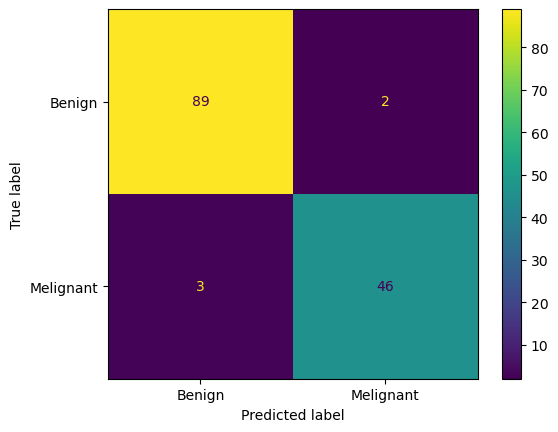

In [386]:
conf_mat=confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix :')
print(conf_mat)
cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Benign', 'Melignant'])
cm_display.plot()
plt.show()

__XGBoost__

- In XGBoost, one-hot encoding is used for multi-class classification problems to transform the categorical target variables into a binary matrix format.
- XGBoost, along with other gradient boosting methods, enhances model accuracy by optimizing specific loss functions. Logarithmic Loss(Log Loss) also known as Cross-Entropy Loss is used as an evaluation metric for this classification problems.

In [338]:
y.dtype

dtype('int64')

In [391]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(y)

# no need to do it bcoz y is already int64 data type in ordered manner 0, 1 so no need encoding

In [399]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 187.9 kB/s eta 0:11:05
   ---------------------------------------- 0.1/124.9 MB 297.7 kB/s eta 0:07:00
   ---------------------------------------- 0.1/124.9 MB 302.7 kB/s eta 0:06:53
   ---------------------------------------- 0.1/124.9 MB 302.7 kB/s eta 0:06:53
   ---------------------------------------- 0.2/124.9 MB 620.6 kB/s eta 0:03:21
   ---------------------------------------- 0.3/124.9 MB 827.2 kB/s eta 0:02:31
   ---------------------------------------- 0.5/124.9 MB 1.1 MB/s eta 0:01:57
   ---------------------------------------- 0.7/124.9 MB 1.4 MB/s eta 0:01:29
   ---------------------------------------- 0.9/124.9 MB 1.7 MB/s e

In [82]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
xgb_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', XGBClassifier(n_estimators=100, random_state=7, learning_rate=0.04, max_depth=3, eval_metric='logloss'))
])
xgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.04,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=7, ...))])

No need to use imputer in pipeline also version from 1.5 the parameter in XGBClassifier().

use_label_encoder=True was a default parameter in older version of xgboost but now it suggest that do encoding manually if variable is not already integer and set the parameter use_label_encoder=False. that is xgboost not doing encoding internally. and now in future version this parameter use_label_encoder will be removed. and no logner internal encoding. for encoding do it manually by labelencoder

In [120]:
y_train_pred=xgb_pipeline.predict(x_train)
y_test_pred=xgb_pipeline.predict(x_test)

training_accuracy=accuracy_score(y_train, y_train_pred)
testing_accuracy=accuracy_score(y_test, y_test_pred)

print('XGBoost Classification :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

XGBoost Classification :
Training Accuracy : 0.9838998211091234
Testing Accuracy : 0.9428571428571428


In [162]:
x_train['Bare Nuclei'].value_counts()

Bare Nuclei
1     321
10    105
2      27
5      24
3      22
8      15
4      14
7       8
9       7
6       2
Name: count, dtype: int64

In [164]:
x_test['Bare Nuclei'].value_counts()

Bare Nuclei
1     81
10    27
8      6
5      6
3      6
4      5
2      3
9      2
6      2
Name: count, dtype: int64

In [166]:
# cross validation
kfold=KFold(n_splits=10, shuffle=True, random_state=7)
cv_scores=cross_val_score(xgb_pipeline, x_train, y_train, cv=kfold, error_score='raise')
print('Cross Validation Scores :',cv_scores)
print('CV Scores Mean :',cv_scores.mean())

Cross Validation Scores : [0.96428571 0.98214286 0.91071429 0.98214286 0.96428571 0.94642857
 1.         0.91071429 0.98214286 0.92727273]
CV Scores Mean : 0.957012987012987


In [168]:
print('XGBoost Classification Report :')
print(classification_report(y_test, y_test_pred))

XGBoost Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.94      0.92      0.93        49

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140



Confusion Matrix :
[[88  3]
 [ 4 45]]


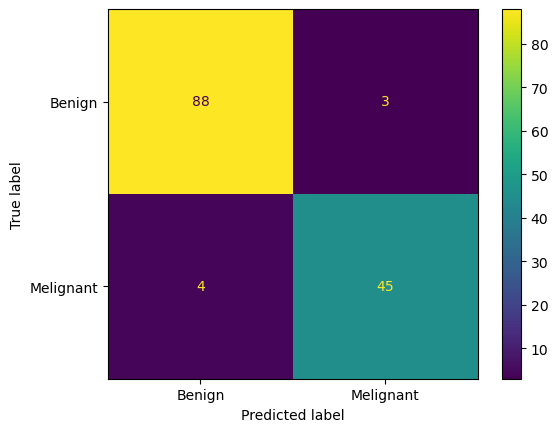

In [170]:
conf_mat=confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix :')
print(conf_mat)
cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Benign', 'Melignant'])
cm_display.plot()
plt.show()

__CatBoost__

In [176]:
pip install catboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 393.8 kB/s eta 0:04:19
   ---------------------------------------- 0.1/101.7 MB 737.3 kB/s eta 0:02:18
   ---------------------------------------- 0.2/101.7 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.5/101.7 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 1.0/101.7 MB 3.7 MB/s eta 0:00:28
    --------------------------------------- 1.5/101.7 MB 4.7 MB/s eta 0:00:22
    --------------------------------------- 1.8/101.7 MB 5.4 MB/s eta 0:00:19
    --------------------------------------- 2.1/101.7 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 2.1/101.7 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 2.1/101.7 MB 5.3 MB/s eta 0:00:19
    --------------------------------------- 2.4/101.7 MB 4.4 MB/s eta 0:0

In [87]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
cat_pipeline=Pipeline([
    ('Scaler', MinMaxScaler()),
    ('classifier', CatBoostClassifier(n_estimators=100, random_state=7,learning_rate=0.04, eval_metric='Logloss', max_depth=3))
])
cat_pipeline.fit(x_train, y_train)

0:	learn: 0.6648976	total: 870us	remaining: 86.1ms
1:	learn: 0.6374903	total: 1.9ms	remaining: 93.3ms
2:	learn: 0.6114005	total: 2.53ms	remaining: 81.7ms
3:	learn: 0.5867240	total: 3.1ms	remaining: 74.3ms
4:	learn: 0.5649821	total: 3.63ms	remaining: 68.9ms
5:	learn: 0.5431888	total: 4.23ms	remaining: 66.3ms
6:	learn: 0.5220656	total: 4.89ms	remaining: 65ms
7:	learn: 0.5031579	total: 5.46ms	remaining: 62.8ms
8:	learn: 0.4842724	total: 6.06ms	remaining: 61.2ms
9:	learn: 0.4679085	total: 6.62ms	remaining: 59.6ms
10:	learn: 0.4515678	total: 7.78ms	remaining: 62.9ms
11:	learn: 0.4359386	total: 8.41ms	remaining: 61.7ms
12:	learn: 0.4205767	total: 11.9ms	remaining: 79.8ms
13:	learn: 0.4064056	total: 12.6ms	remaining: 77.2ms
14:	learn: 0.3931097	total: 13.2ms	remaining: 74.7ms
15:	learn: 0.3811698	total: 14.2ms	remaining: 74.3ms
16:	learn: 0.3694108	total: 14.8ms	remaining: 72.1ms
17:	learn: 0.3581255	total: 15.4ms	remaining: 70.2ms
18:	learn: 0.3466665	total: 16ms	remaining: 68.3ms
19:	learn:

Pipeline(steps=[('Scaler', MinMaxScaler()),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x00000279FB0426C0>)])

Bydefault Learning rate set to 0.066386. it's range from 0 < learning_rate <= 1. 
- Small values(from 0 to 0.1) More accurate models but require more iterations.
- Moderate values(from 0.1 to 0.3) A good balance between speed and performance.
- Large values(> 0.3) Can cause the model to converge too quickly and potentially miss the optimal solution (overfitting or underfitting).
- by use of learning_rate parameter in catboost, xgboost we fix the overfitting

In [89]:
y_train_pred=cat_pipeline.predict(x_train)
y_test_pred=cat_pipeline.predict(x_test)

training_accuracy=accuracy_score(y_train, y_train_pred)
testing_accuracy=accuracy_score(y_test, y_test_pred)

print('Cat Boost Classifier :')
print('Training Accuracy :',training_accuracy)
print('Testing Accuracy :',testing_accuracy)

Cat Boost Classifier :
Training Accuracy : 0.9767441860465116
Testing Accuracy : 0.9571428571428572


In [91]:
# cross validation
kfold=KFold(n_splits=10, shuffle=True, random_state=7)
cv_scores=cross_val_score(cat_pipeline, x_train, y_train, cv=kfold)  # error_score='raise' is default in catboost so no need to use
print('Cross Validation Scores :',cv_scores)
print('CV Scores Mean :',cv_scores.mean())

0:	learn: 0.6631522	total: 741us	remaining: 73.4ms
1:	learn: 0.6358952	total: 1.97ms	remaining: 96.4ms
2:	learn: 0.6099719	total: 2.63ms	remaining: 84.9ms
3:	learn: 0.5851708	total: 3.13ms	remaining: 75.1ms
4:	learn: 0.5638060	total: 3.66ms	remaining: 69.5ms
5:	learn: 0.5420126	total: 4.12ms	remaining: 64.6ms
6:	learn: 0.5209990	total: 4.61ms	remaining: 61.2ms
7:	learn: 0.5030923	total: 5.44ms	remaining: 62.5ms
8:	learn: 0.4845266	total: 6.03ms	remaining: 61ms
9:	learn: 0.4680262	total: 6.55ms	remaining: 58.9ms
10:	learn: 0.4516105	total: 7.03ms	remaining: 56.9ms
11:	learn: 0.4360966	total: 7.5ms	remaining: 55ms
12:	learn: 0.4210293	total: 7.99ms	remaining: 53.4ms
13:	learn: 0.4076562	total: 8.47ms	remaining: 52.1ms
14:	learn: 0.3941088	total: 9.01ms	remaining: 51ms
15:	learn: 0.3807440	total: 9.52ms	remaining: 50ms
16:	learn: 0.3697725	total: 10.1ms	remaining: 49.1ms
17:	learn: 0.3585621	total: 11ms	remaining: 50.2ms
18:	learn: 0.3472052	total: 12.3ms	remaining: 52.3ms
19:	learn: 0.33

In [93]:
print('Cat Boost Classification Report :')
print(classification_report(y_test, y_test_pred))

Cat Boost Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        91
           1       0.94      0.94      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



Confusion Matrix :
[[88  3]
 [ 3 46]]


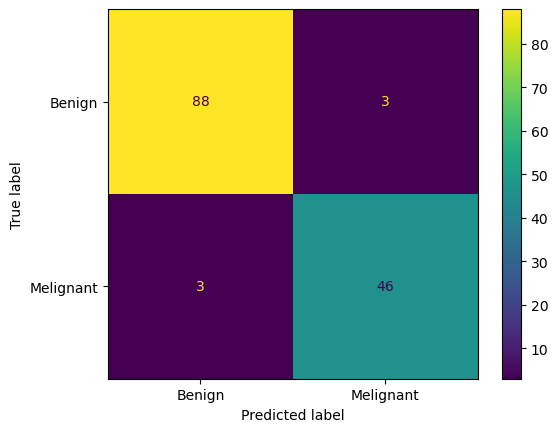

In [95]:
conf_mat=confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix :')
print(conf_mat)

cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Benign', 'Melignant'])
cm_display.plot()
plt.show()

From above classifiers gradient boosting, xgboost, catboost the catboost is best for this beast cancer dataset because traing accuracy is 98% and testing accuracy is 96 % the model generalize well without overfitting

__Advantages of Boosting__

- It enhances accuracy by reducing both bias and variance significantly.
- It is adaptable and compatible with various types of models.
- It is efficient in complex scenarios where simple models struggle.
- we can fix the overfitting in XGBoost or catboost by introducing the parameter learning_rate, max_depth, eval_metric

__Disadvantages of Boosting__

- It is more susceptible to overfitting compared to bagging when dealing with noisy data.
- It demands more computational resources as models are trained sequentially.
- It requires careful parameter tuning to prevent overfitting.

### Stacking

Stacking combines the multiple classification or regression model as base model on training dataset. All the base model are trained on full dataset rather than subset or sample of dataset. After the it combine the predictions of all base model which consider as the new training set then again we apply a classification or regression model on new training set. this model is called meta-model. This Single(Meta-model) model give the final prediction from contributing base model.

- The structure of a stacking model consists of multiple base models, also known as level-0 models, alongside a meta-model that integrates their predictions, known as the level-1 model.
- __Level-0 Models(Base Models):__ These models are trained on full training dataset and their individual predictions are aggregated.
- __Level-1 Model(Meta Model):__ This model is designed to optimally combine the predictions of multiple base models to generate the final prediction

`vecstack` is a python package for `stacking`.

- `Stacking` in `vecstack` allows for custom cross-validation strategies, including stratified k-fold cross-validation, shuffling, and setting random seeds for reproducibility.
- This feature provides more control over model training and evaluation.
- Explicitly generates out-of-fold predictions for the original training data, which used as features for the meta-model. This process can help in preventing overfitting and providing a robust estimate of model performance.
- The models make predictions for x_train called `out-of-fold` predictions for each base model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Define the URL of the dataset
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df=pd.read_csv(link, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.columns=['Class', 'Alcohol', 'Malic acid', 'Ash',
         'Alkalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
         'Proline']
df.head()

,Class,Alcohol,Malic acid,Ash,Alkalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df['Class'].value_counts()

Class
2    71
1    59
3    48
Name: count, dtype: int64

In [8]:
df['Class']=df['Class'].replace({1 : 0, 2 : 1, 3 : 2})

In [10]:
df['Class'].value_counts()

Class
1    71
0    59
2    48
Name: count, dtype: int64

In [12]:
x=df.drop('Class', axis=1)
y=df['Class']

In [14]:
# Either rplace 1, 2, 3 in 'Class' column by 0, 1, 2 manually i.e
# df['Class']=df['Class'].replace({1 : 0, 2 : 1, 3 : 2})  or we can label econding it

# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# y=encoder.fit_transform(y)

In [83]:
pip install vecstack


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19874 sha256=2785cec5019f7003e8d6cc2a9e0ef2946132bbeeacf1f85f2ce9ee58c901209c
  Stored in directory: c:\users\hemant ojha\appdata\local\pip\cache\wheels\60\62\ce\d16e9d9fb8303d3d80c6b7f536fb90a016a06dd5941df63ae7
Successfully built vecstack


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
base_models=[KNeighborsClassifier(n_neighbors=5),
             RandomForestClassifier(n_estimators=100, random_state=42),
             XGBClassifier(eval_metric='mlogloss')
]

mlogloss - use to evaluate the log loss in multi class classification

logloss - use in binary class classification. both have the same purpose as to minimize the loss function

__what is verbose parameter__

- verbose is a parameter commonly found in machine learning libraries, and it controls the level of detail shown during the execution of a task, such as training a model, performing cross-validation, or stacking models.

__When to use:__

- Track Progress: Helps monitor the progress of a task. See how far along the process is, especially for long tasks (e.g., training on large datasets).
- Debugging: Useful for debugging, tracking performance. Identify issues or where a process might be stuck
- Monitor Model Behavior: Get real-time insights into model performance or convergence (e.g., during training).

__Values:__

- `verbose`=0 : No output (default in most cases).
- `verbose`=1 : Basic progress information (e.g., starting/ending)
- `verbose`=2 : Detailed information about each step of the process.
- `verbose`=3 : Some implementations may have higher values. So for more detailed information we use `verbose`=3

__Why x_test use in stacking class__

In stacking function we use x_train, y_train to train the base model. Once base mode trained use x_test to generate predictions. these predictions are meta-features for meta-model.

__Another parameters__

- n_folds: it is cross validation folds
- regression=False:  means we are doing the classification problem
- mode='oof_pred_bag': it is a default parameter no need to use it means that out of fold prediction for each model are bagged (i.e., the predictions from each fold are averaged)
- save_dir=None: it is a default parameter no need to use. but if want save the out of fold predictions then provided path of directory where u want to save i.e save_dir='directory_path'
- needs_proba=False: If we use `False` the base models will return class labels(ex: 0 or 1) instead of probabilities. If we use `True` the base models will return the predicted probabilities for each class, instead of just the class labels. __This can be helpful if you're using the predicted probabilities for the meta model__ in certain cases (e.g., when training a meta-model that benefits from probabilistic outputs like Logistic Regression). Typically needs_proba=True in case regression. if we use Logistic Regression as meta model then we can use `True` but base model should be regressor not classifier. Note that `needs_proba=False` is default parameter in stacking. so if we want predicted probability then use True else it will defalt return class label.

In [76]:
s_train, s_test = stacking(base_models, x_train, y_train, x_test,
                           metric=accuracy_score, regression=False,
                           n_folds=5, stratified=True, shuffle=True,
                           random_state=42, verbose=2)
meta_model=LogisticRegression() 
meta_model.fit(s_train, y_train)

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.82758621]
    fold  1:  [0.65517241]
    fold  2:  [0.64285714]
    fold  3:  [0.64285714]
    fold  4:  [0.75000000]
    ----
    MEAN:     [0.70369458] + [0.07382427]
    FULL:     [0.70422535]

model  1:     [RandomForestClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.96551724]
    fold  2:  [1.00000000]
    fold  3:  [0.92857143]
    fold  4:  [1.00000000]
    ----
    MEAN:     [0.97881773] + [0.02845227]
    FULL:     [0.97887324]

model  2:     [XGBClassifier]
    fold  0:  [1.00000000]
    fold  1:  [0.89655172]
    fold  2:  [0.92857143]
    fold  3:  [0.92857143]
    fold  4:  [1.00000000]
    ----
    MEAN:     [0.95073892] + [0.04188641]
    FULL:     [0.95070423]



LogisticRegression()

__Observations__

Mean testing Accuracy of Base Models as below-
- For KNN Classifier the mean accuracy is 70%
- For RF Classifier the mean accuracy is 98%
- For XGB Classifier the mean accuracy is 95%

In [78]:
y_train_pred=meta_model.predict(s_train)
y_test_pred=meta_model.predict(s_test)

training_accuracy=accuracy_score(y_train, y_train_pred)
testing_accuracy=accuracy_score(y_test, y_test_pred)

print('stacking :')
print('Training Accuracy with Logistic Regression as meta-model :',training_accuracy)
print('Testing Accuracy with Logistic Regression as meta-model :',testing_accuracy)

stacking :
Training Accuracy with Logistic Regression as meta-model : 0.9788732394366197
Testing Accuracy with Logistic Regression as meta-model : 0.9722222222222222


Training and Testing accuracy of stacking ensemble with logistic regression as meta model is 97%, which is pretty high and meta-model generalize well on prediction of training set and unseen data y_train without overfitting 

In [60]:
y_test_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0], dtype=int64)

In [62]:
s_test

array([[2, 0, 0],
       [0, 0, 0],
       [2, 2, 2],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [2, 1, 1],
       [0, 2, 2],
       [1, 1, 1],
       [0, 2, 2],
       [2, 0, 0],
       [2, 2, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [2, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [2, 1, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 2, 2],
       [1, 1, 1],
       [2, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [66]:
print('Shape of x_train :',x_train.shape)
print('Shape of x_test :',x_test.shape)
print('Shape of s_train :',s_train.shape)
print('Shape of s_test :',s_test.shape)

Shape of x_train : (142, 13)
Shape of x_test : (36, 13)
Shape of s_train : (142, 3)
Shape of s_test : (36, 3)


We can see the number of features in x_train and x_test are 13 but in s_train and s_test it are 3 because features of meta model are base models so number of base models are 3 rtherefore features of meta model are 3

by using n_folds=5 as the cross validation fold. the predictions of all three base model. now check consistency of meta-model

In [80]:
# cross validation
kfold=KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores=cross_val_score(meta_model, s_train, y_train, cv=kfold)
print('Cross Validation Scores :',cv_scores)
print('CV Scores Mean :',cv_scores.mean())

Cross Validation Scores : [0.93103448 0.96551724 0.96428571 1.         0.96428571]
CV Scores Mean : 0.9650246305418719


Confusion Matrix :
[[14  0  0]
 [ 0 14  0]
 [ 0  1  7]]


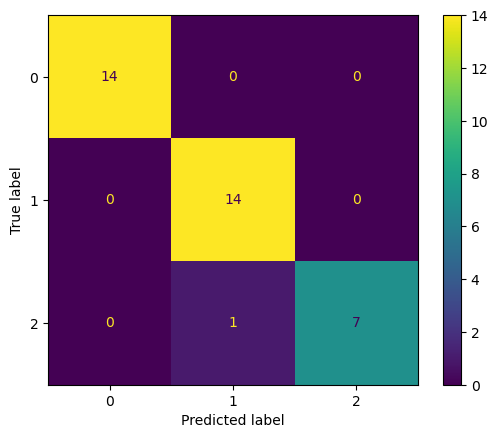

In [96]:
conf_mat=confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix :')
print(conf_mat)

class_order=meta_model.classes_
cm_display=ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=class_order)
cm_display.plot()
plt.show()

In [98]:
conf_mat_df=pd.DataFrame(conf_mat, index=class_order, columns=class_order)
conf_mat_df

,0,1,2
0,14,0,0
1,0,14,0
2,0,1,7


__Advantages & Disadvantage of stacking__

__Advantage__

- Accomplishes greater accuracy than simplistic ensemble techniques
- Possesses the capability to rectify errors made by base models

__Disadvantage__

- Risk of overfitting the meta-model
- Requires careful selection of both base and meta-models

__Q:__ why did you select KNN, RF, XGB classifiers as base model and Logistic regression as meta model here



### Blending